# Week 4: Advanced CNN Architectures

**Recap**
- Convolutional layer output sizes
- Pooling layers
- Fully-connected layers
- Dropout

**CNN Architectures**
- LeNet
- AlexNet
- VGG
- ResNet

**Localization Architectures**
- R-CNN
- Fast R-CNN
- Faster R-CNN

## Recap

![Conv nets](http://cs231n.github.io/assets/cnn/cnn.jpeg)

Source: http://cs231n.github.io/

A simple architecture example:

| Layer         		|     Description	        					| 
|:---------------------:|:---------------------------------------------:| 
| Input             | 32x32x3 Grayscale image   			 		    | 
| Convolution 5x5   | 1x1 stride, valid padding, outputs 28x28x12 	    |
| RELU  		    | Activation function    							|
| Pooling   	   	| outputs 14x14x12 	    		                 	|
| Fully connected	| outputs (10,)        							    |


### Main types of layers

- Convolutional layer
- Pooling layer
- Fully-connected layer 

**Convolutional layer**

We have to pick output depth, stride, padding, filter size, etc.

For the depth it is common practice to increase it by 2^x (e.g. 16, 32, 64, 128, 512, etc.)

Stride is usually 1 or 2 (3 or more is very uncommon). 

We usually use padding if we want to maintain (or control in other ways) the spatial size of the output.

How to calculate the output size:

*(W−F+2P)/S+1*

W = input volume size
F = Filter size
S = Stride
P = Padding


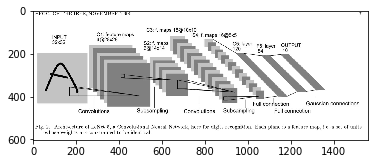

In [5]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

img = cv2.cvtColor(cv2.imread('images/lenet.jpg'), cv2.COLOR_BGR2GRAY)

plt.imshow(img, cmap='gray')
#plt.imshow(img[200:300,300:400], cmap='gray')

**Pooling**

Typical values are a 2x2 filter and 2x2 stride -> Discards 75% of the operations. 

## CNN Architectures

### LeNet

![LeNet](images/lenet.JPG)

| Layer         		|     Description	        					| 
|:---------------------:|:---------------------------------------------:| 
| Input             | 32x32x1 Grayscale image   			 		    | 
| Convolution 5x5   | 1x1 stride, valid padding, outputs 28x28x6 	    |
| Subsampling	   	| outputs 14x14x6 	    		                 	|
| Convolution 5x5   | 1x1 stride, valid padding, outputs 10x10x16    	|
| Subsampling	   	| outputs 5x5x16 	    		                 	|
| Fully connected	| outputs (120,)        							|
| Fully connected	| outputs (84,)        							    |
| Output		    | outputs (10,)   									|


Paper: http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf

- Not very deep
- Subsampling -> Pooling
- Great starting point

### AlexNet

![AlexNet](https://cdn-images-1.medium.com/max/1200/1*wzflNwJw9QkjWWvTosXhNw.png)

| Layer         		|     Description	        					| 
|:---------------------:|:---------------------------------------------:| 
| Input             | 227x227x3 Color image      			 		    | 
| Convolution 11x11 | 4x4 stride, valid padding                  	    |
| Max pooling	   	|                                        			|
| Normalization     |					     				     		|
| Convolution       |		     				     		            |
| Max pooling	   	|                                        			|
| Normalization     |					     				     		|
| Convolution       |		     				     		            |
| Convolution       |		     				     		            |
| Convolution       |		     				     		            |
| Max pooling	   	|                                        			|
| Fully connected	|                        							|
| Fully connected	|                        							|
| Fully connected	|                        							|

- Similar to LeNet but bigger and deeper (8 layers)
- Divided on to GPUs due to size
- Large filters and strides
- First to use ReLU
- Heavy data augmentation
- Dropout 0.5


### VGGNet

![VGG](https://qph.fs.quoracdn.net/main-qimg-e657c195fc2696c7d5fc0b1e3682fde6)

- Even deeper (16/19 layers)
- Smaller filter sizes (3x3) and stride (1x1)

![Filter](images/filter.jpg)

### ResNet

![ResNet](https://cdn-images-1.medium.com/max/1000/1*S3TlG0XpQZSIpoDIUCQ0RQ.jpeg)

- Even deeper (152 layers)
- Deeper models are more difficult to optimize
- Solves dimishing gradients with skip connections (short-cut jumps over some layers

## Localization Architectures

![Tasks](images/tasks.JPG)

Classification Output -> Classes

Localization Output -> Box coordinates (x, y w, h)

Treat it as a regression problem

![Regression](images/regression.JPG)

**What happens when we want to find an unknown number of objects?**

We can use sliding windows

![sliding](images/sliding.JPG)

- If our classifier is fast enough we can do it (HOG)

**Region proposals**

![Proposals](images/proposals.JPG)

Adding both methods together we get:

**R-CNN**

![rcnn](images/rcnn.JPG)

- Very heavy (200GB for PASCAL dataset)
- Very slow (independent forward passes of the CNN)

**Fast R-CNN**

![Fast](images/fast.JPG)